In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from preprocess import preprocessor
from preprocess import clean_df
from preprocess import define_vocab_to_remove
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight

from model_class import Model_Baseline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.linear_model import SGDClassifier


In [2]:
data = pd.read_csv("labelled_newscatcher_dataset.csv", sep=";")
data

X, y = clean_df(data)


c:\Users\quent\OneDrive\Bureau\NLP\NLP_project\preprocess.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["title"] = filtered_data["title"].astype(str)


In [3]:
words_to_remove = define_vocab_to_remove(X)
len(words_to_remove)


239

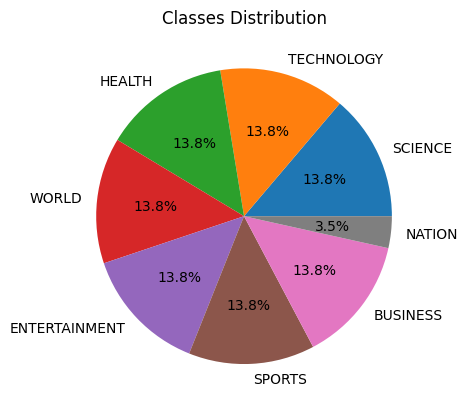

In [4]:
class_labels = ['SCIENCE', 'TECHNOLOGY', 'HEALTH', 'WORLD', 'ENTERTAINMENT', 'SPORTS', 'BUSINESS', 'NATION']

# plot the calsses distribution for this sample
plt.pie(y.value_counts(), labels = y.unique().tolist(), autopct='%1.1f%%')
plt.title("Classes Distribution")
plt.show()

label_encoder = LabelEncoder() # instantiate a label encoder 
y_enc = label_encoder.fit_transform(y)

In [5]:
# As we can see we have a the nation class that is under represented in the sample 
# We then try to apply weights to balanced the model's learning
class_weights = compute_class_weight('balanced', classes=np.unique(y_enc), y=y_enc)
weigth_dict = {0: class_weights[0], 
               1: class_weights[1],
               2: class_weights[2],
               3: class_weights[3],
               4: class_weights[4],
               5: class_weights[5],
               6: class_weights[6],
               7: class_weights[7]
               }

In [11]:
model = Model_Baseline(X,y_enc, LogisticRegression(class_weight=weigth_dict, max_iter = 100),TfidfVectorizer,words_to_remove, class_labels) # Instanciate the model class
model.fit() # Fitting the model
y_pred = model.predict() # Make the predictions
class_labels=label_encoder.inverse_transform(range(8))

model.report(y_pred,class_labels) # Show report on model performances

c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



               precision    recall  f1-score   support

     BUSINESS       0.78      0.77      0.78      2922
ENTERTAINMENT       0.83      0.87      0.85      2952
       HEALTH       0.75      0.79      0.77      3006
       NATION       0.66      0.69      0.67      2970
      SCIENCE       0.77      0.88      0.82       764
       SPORTS       0.91      0.91      0.91      3009
   TECHNOLOGY       0.90      0.85      0.88      3111
        WORLD       0.71      0.64      0.67      3021

     accuracy                           0.79     21755
    macro avg       0.79      0.80      0.79     21755
 weighted avg       0.79      0.79      0.79     21755

